In [45]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import ppscore as pps
from sklearn.ensemble import IsolationForest
plt.rcParams['figure.figsize'] = (14,9)
%matplotlib inline

In [2]:
data = pd.read_csv(r"D:\ExcelR Assignments\Question\EDA2\EDA2\adult_with_headers.csv")

In [3]:
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
data.duplicated().sum()

np.int64(24)

In [6]:
data.drop_duplicates(inplace = True)

In [7]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [8]:
data['native_country'] = data['native_country'].astype(str).str.strip() # Remove spaces
data['native_country'] = data['native_country'].replace('?', np.nan)

In [9]:
data['native_country'] = data['native_country'].fillna(data['native_country'].mode()[0])

<Axes: >

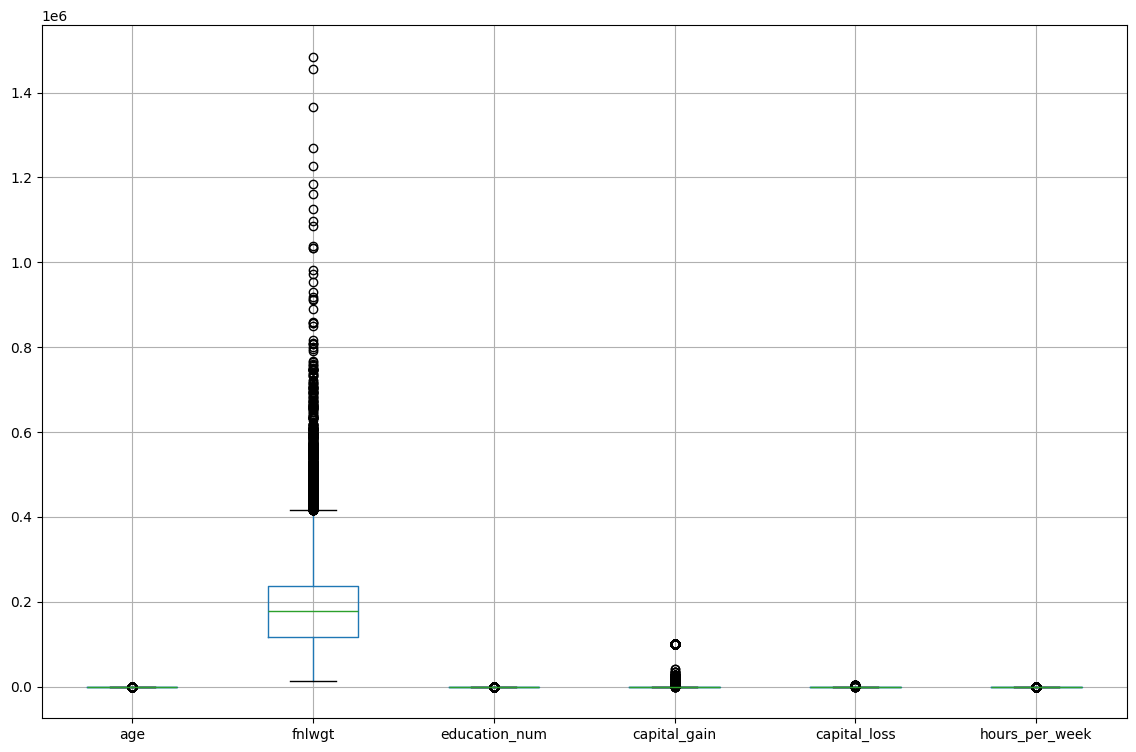

In [10]:
data.boxplot()

In [11]:
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Isolation Forest for removing outliers

In [12]:
iso_forest = IsolationForest(contamination='auto', random_state=42) 

In [13]:
data['Outlier'] = iso_forest.fit_predict(data.select_dtypes(include = [int,float]))

In [14]:
data = data[data['Outlier'] != -1].drop(columns = ['Outlier'])

In [15]:
#reset index because we use isolation forest which makes index irregular by removing outliers
data = data.reset_index(drop = True) 

<Axes: >

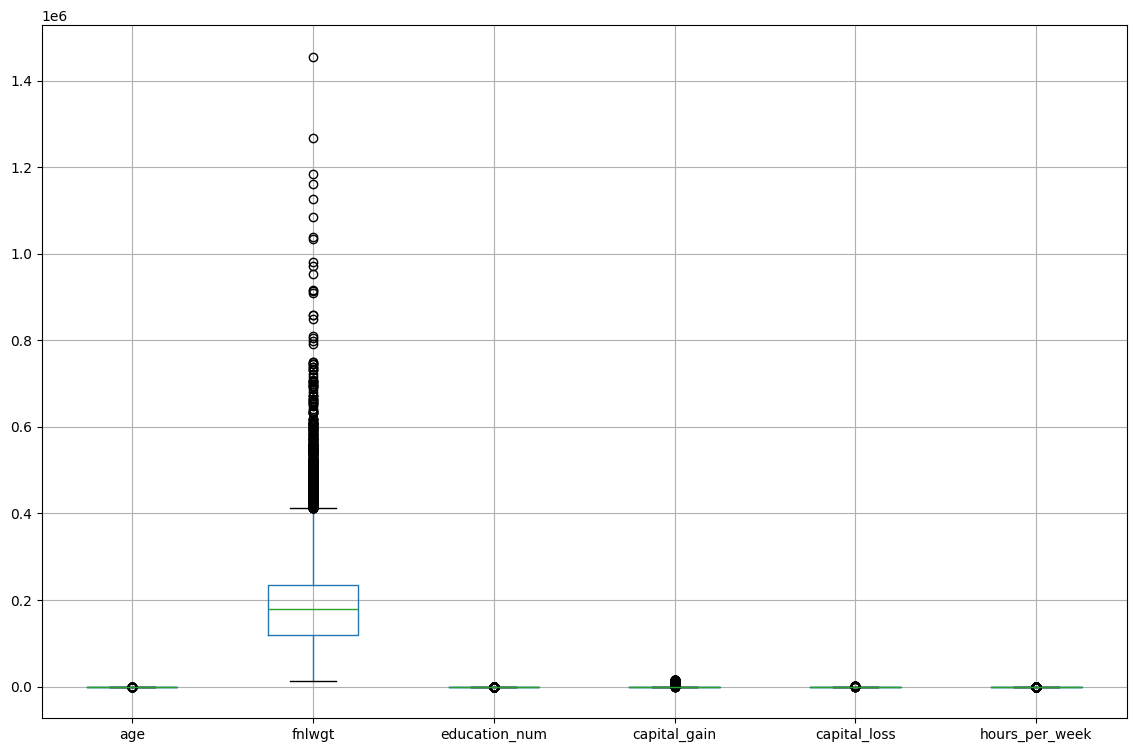

In [16]:
data.boxplot()

### Feature Enginnering

In [17]:
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28934,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
28935,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
28936,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
28937,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [18]:
data['workclass'] = data['workclass'].astype(str).str.strip()
data['workclass_simplified'] = data['workclass'].replace({
    'State-gov': 'Government',
    'Federal-gov': 'Government',
    'Local-gov': 'Government',
    'Self-emp-not-inc': 'Self-employed',
    'Self-emp-inc': 'Self-employed',
    'Never-worked': 'Non-worker',
    'Without-pay': 'Non-worker',
    'Private': 'Private',
    '?': 'Unknown'
})

In [19]:
data['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Never-worked', 'Without-pay'],
      dtype=object)

In [20]:
data['workclass_simplified'].unique()

array(['Government', 'Self-employed', 'Private', 'Unknown', 'Non-worker'],
      dtype=object)

In [21]:
data.drop('workclass', axis = 1, inplace = True)

In [22]:
data['Experience_score'] = data['age'] * data['hours_per_week']

In [23]:
data

,age,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,workclass_simplified,Experience_score
0,39,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,Government,1560
1,50,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Self-employed,650
2,38,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,Private,1520
3,53,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Private,2120
4,28,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Private,1120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28934,22,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K,Private,880
28935,27,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,Private,1026
28936,40,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,Private,1600
28937,58,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,Private,2320


In [24]:
data.drop(['age','hours_per_week'], axis = 1, inplace = True)

In [25]:
data

,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,native_country,income,workclass_simplified,Experience_score
0,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,United-States,<=50K,Government,1560
1,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,United-States,<=50K,Self-employed,650
2,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,United-States,<=50K,Private,1520
3,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,United-States,<=50K,Private,2120
4,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,Cuba,<=50K,Private,1120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28934,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,United-States,<=50K,Private,880
28935,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,United-States,<=50K,Private,1026
28936,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,United-States,>50K,Private,1600
28937,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,United-States,<=50K,Private,2320


### Encoding

In [26]:
en_col = ['workclass_simplified','education','marital_status','occupation','relationship','native_country']
for col in en_col:
    encoder = LabelEncoder() # Create a new LabelEncoder for each column
    data[col] = encoder.fit_transform(data[col])  # Directly update the column

In [27]:
ohe_data = pd.get_dummies(data[['race','sex','income']], drop_first = True).astype(int)

In [28]:
data = pd.concat([data.drop(columns = ['race','sex','income']), ohe_data], axis = 1)

### Log Transformation

In [29]:
data.dtypes

fnlwgt                      int64
education                   int64
education_num               int64
marital_status              int64
occupation                  int64
relationship                int64
capital_gain                int64
capital_loss                int64
native_country              int64
workclass_simplified        int64
Experience_score            int64
race_ Asian-Pac-Islander    int64
race_ Black                 int64
race_ Other                 int64
race_ White                 int64
sex_ Male                   int64
income_ >50K                int64
dtype: object

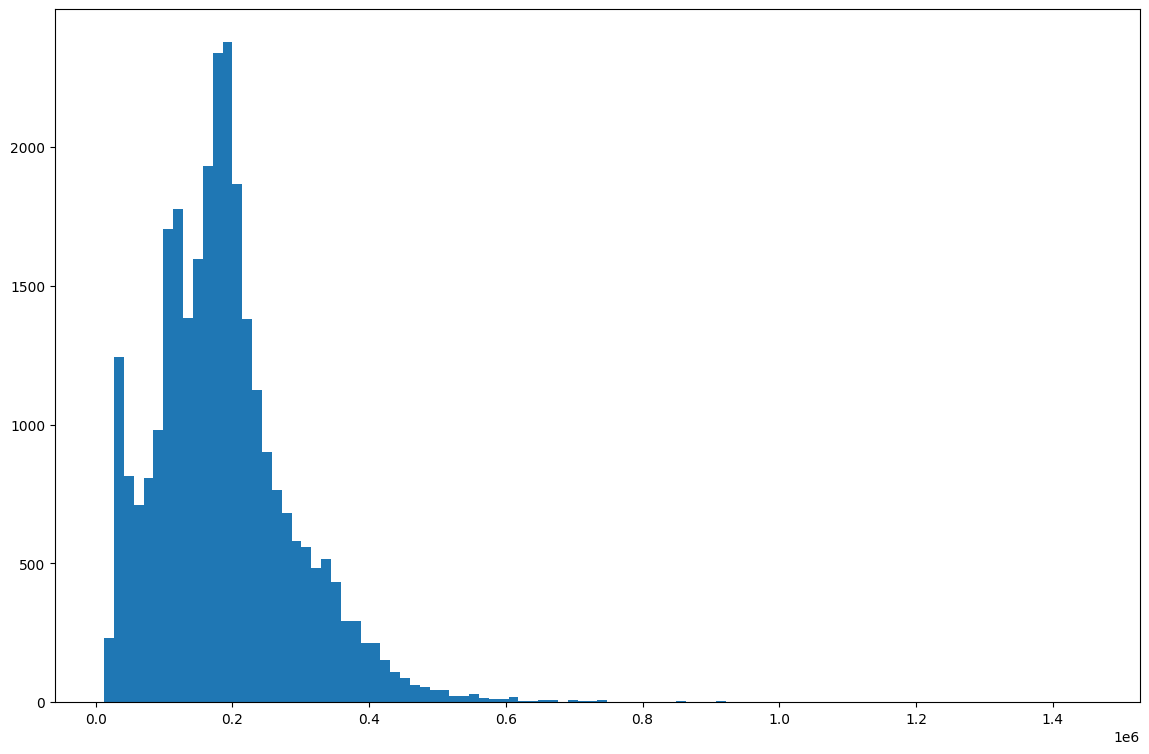

In [30]:
plt.hist(data['fnlwgt'], bins = 100);

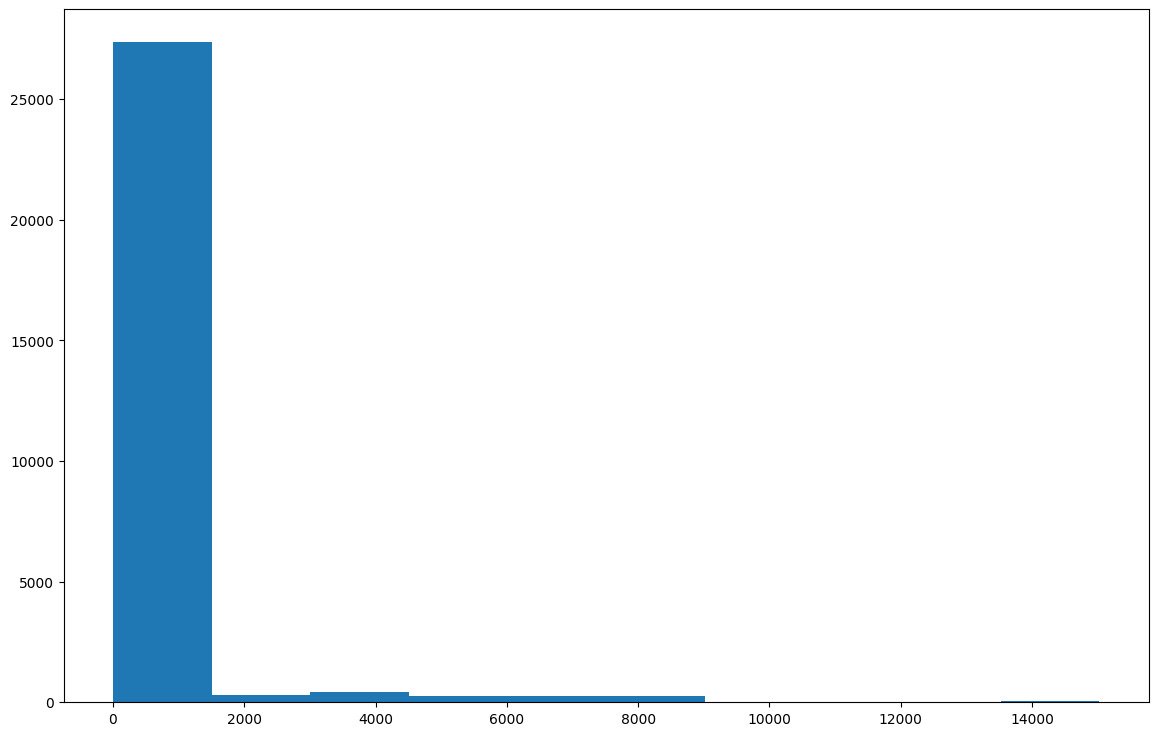

In [31]:
plt.hist(data['capital_gain'], bins = 10);

In [32]:
data['capital_gain'] = np.log1p(data['capital_gain'])

In [33]:
data[['fnlwgt']] = np.log1p(data[['fnlwgt']])

In [34]:
data

,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,native_country,workclass_simplified,Experience_score,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_ >50K
0,11.258253,9,13,4,1,1,7.684784,0,37,0,1560,0,0,0,1,1,0
1,11.330348,9,13,2,4,0,0.000000,0,37,3,650,0,0,0,1,1,0
2,12.281398,11,9,0,6,1,0.000000,0,37,2,1520,0,0,0,1,1,0
3,12.366157,1,7,2,6,0,0.000000,0,37,2,2120,0,1,0,0,1,0
4,12.732013,9,13,2,10,5,0.000000,0,4,2,1120,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28934,12.644821,15,10,4,11,1,0.000000,0,37,2,880,0,0,0,1,1,0
28935,12.458010,7,12,2,13,5,0.000000,0,37,2,1026,0,0,0,1,0,0
28936,11.947140,11,9,2,7,0,0.000000,0,37,2,1600,0,0,0,1,1,1
28937,11.931050,11,9,6,1,4,0.000000,0,37,2,2320,0,0,0,1,0,0


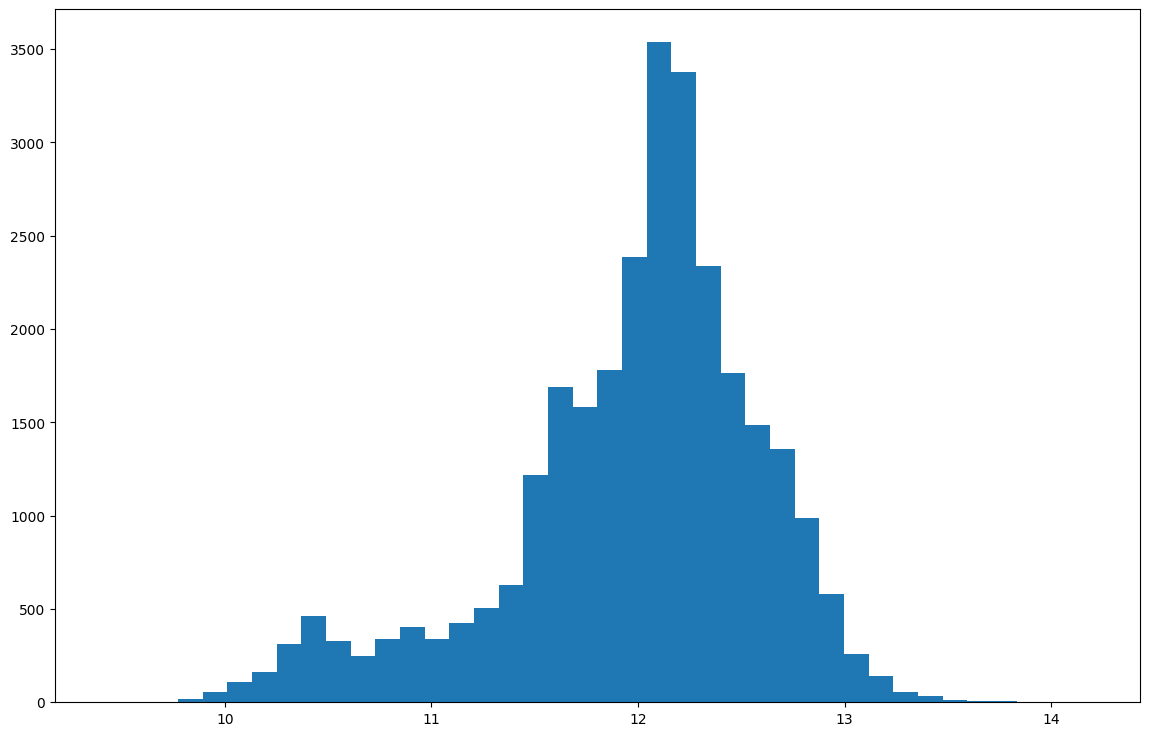

In [35]:
plt.hist(data['fnlwgt'],bins = 40);

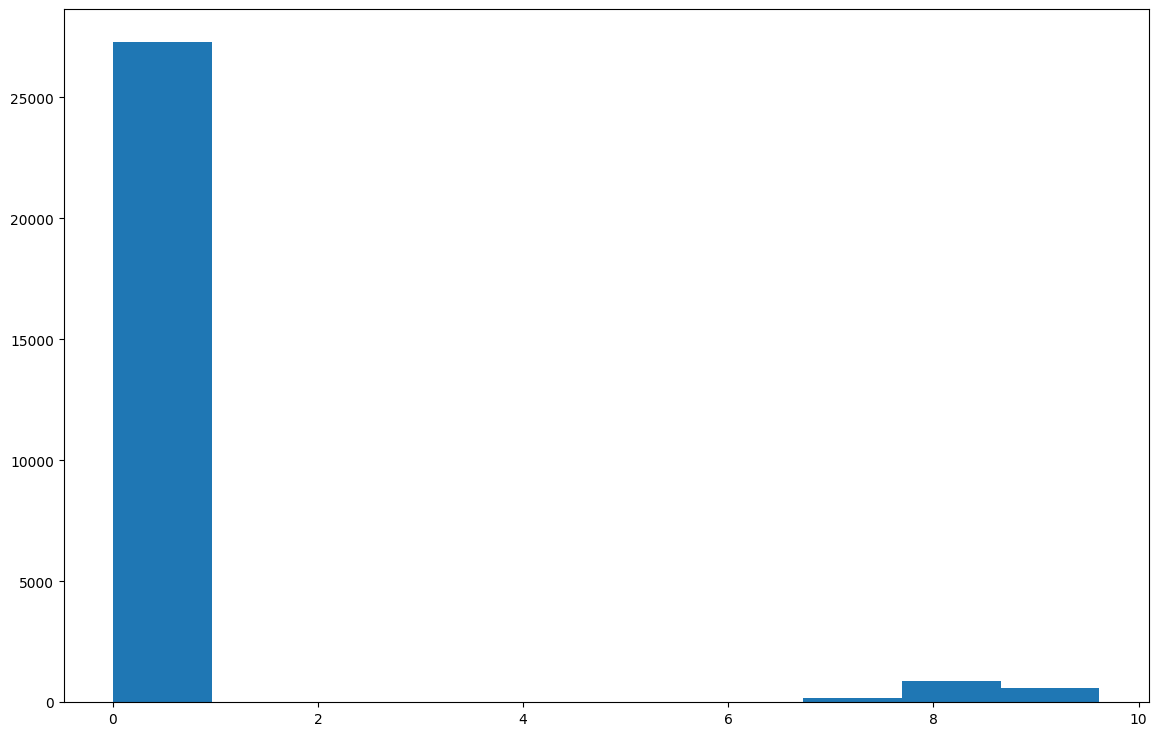

In [36]:
plt.hist(data['capital_gain']);

### Scaling

In [37]:
sc = StandardScaler()
columns_to_scale = ['Experience_score','fnlwgt', 'capital_gain', 'capital_loss']
data[columns_to_scale] = sc.fit_transform(data[columns_to_scale])

In [38]:
data

,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,native_country,workclass_simplified,Experience_score,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_ >50K
0,-1.176322,9,13,4,1,1,3.680541,-0.03235,37,0,0.049666,0,0,0,1,1,0
1,-1.059695,9,13,2,4,0,-0.246380,-0.03235,37,3,-1.319975,0,0,0,1,1,0
2,0.478801,11,9,0,6,1,-0.246380,-0.03235,37,2,-0.010538,0,0,0,1,1,0
3,0.615914,1,7,2,6,0,-0.246380,-0.03235,37,2,0.892521,0,1,0,0,1,0
4,1.207753,9,13,2,10,5,-0.246380,-0.03235,4,2,-0.612578,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28934,1.066703,15,10,4,11,1,-0.246380,-0.03235,37,2,-0.973802,0,0,0,1,1,0
28935,0.764502,7,12,2,13,5,-0.246380,-0.03235,37,2,-0.754057,0,0,0,1,0,0
28936,-0.061922,11,9,2,7,0,-0.246380,-0.03235,37,2,0.109870,0,0,0,1,1,1
28937,-0.087950,11,9,6,1,4,-0.246380,-0.03235,37,2,1.193541,0,0,0,1,0,0


### PPS Score

In [46]:
pps_matrix = pps.matrix(data)

In [52]:
pps_score = pps_matrix.pivot(index = 'x', columns = 'y', values = 'ppscore')

<Axes: xlabel='y', ylabel='x'>

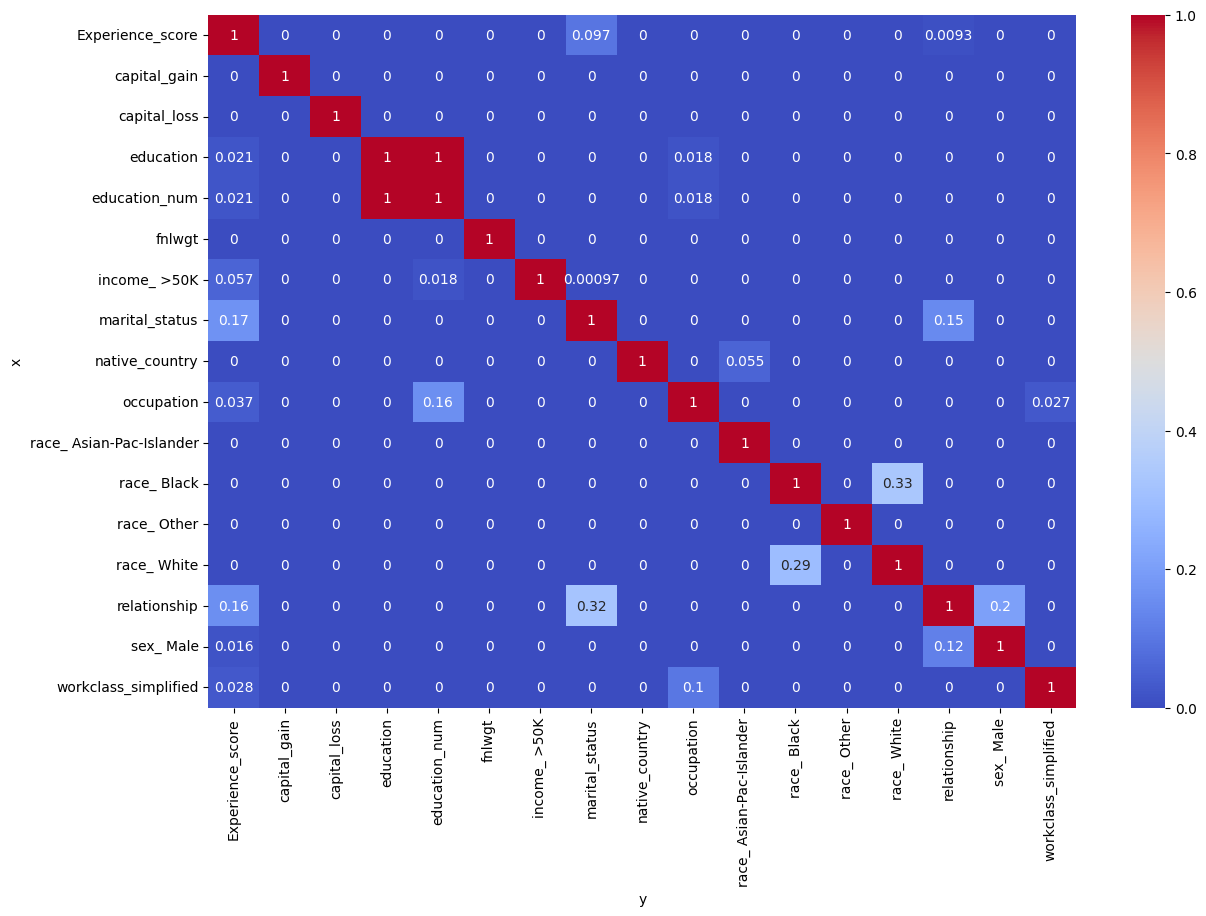

In [53]:
sns.heatmap(pps_score , annot = True , cmap = 'coolwarm')

<Axes: >

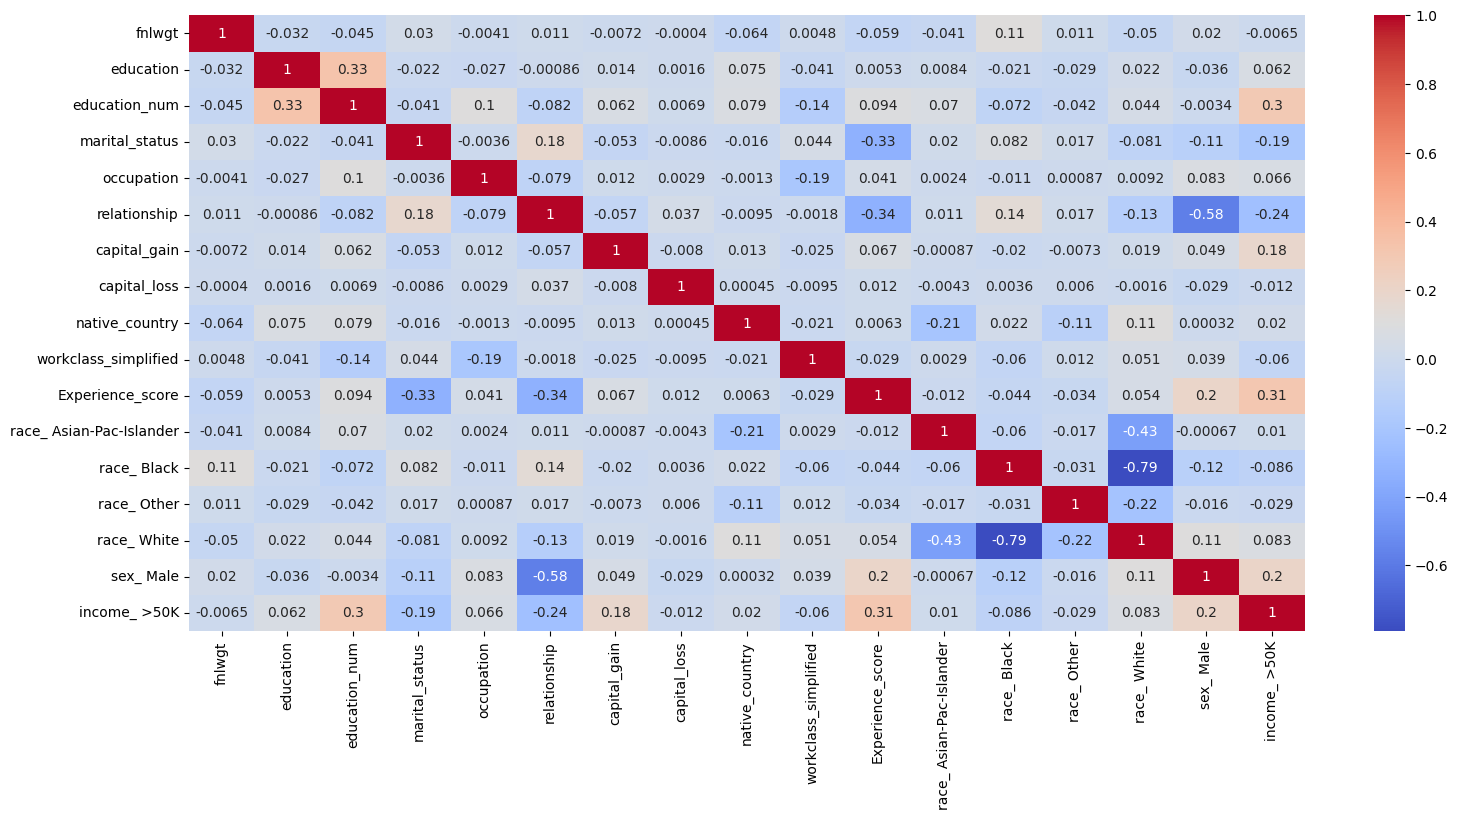

In [61]:
plt.figure(figsize = (18,8))
sns.heatmap(data.corr(), annot = True, cmap  = 'coolwarm')